# Numerical Solution of ODEs

## First Order ODEs

First order ODEs are of the form
$$y'(x) = f(x,y), \quad y(x_0) = y_0$$
where $y(x_0)=y_0$ is the given initial value. Typically, such an ODE is solved by dividing the range $x_0$ to $x_n$ over which the solution is sought into $n$ equal intervals of width $h$, and solving the equation at these points $x_0, x_1=x_0 + h, \ldots, x_n=x_0 + n \cdot h$ The recurrence equation is based on the Taylor Series, considering the first two terms:
$$y(x+h) = y(x) + h \cdot y'(x)$$
Since $y'(x)=f(x,y)$, above equation can be written as:
$$y(x+h) = y(x) + h \cdot f(x,y)$$
Applying this to the sequence of points above, the recurrence equation can be written as:
$$y_{i+1} = y_{i} + h \cdot f(x_i, y_i)$$
Note that the value of $y(x)$ at the current point $y_{i+1}$ requires the slope to be estimated at the previous point $x_i$ and requires the value of the function $y_i$ at the previous point. If the interval is sufficiently small, the solution is close to the exact solution.

           x        Euler        Exact        Error
    0.000000     0.000000     0.000000     0.000000
    0.200000     0.000000     0.021403     0.021403
    0.400000     0.040000     0.091825     0.051825
    0.600000     0.128000     0.222119     0.094119
    0.800000     0.273600     0.425541     0.151941
    1.000000     0.488320     0.718282     0.229962


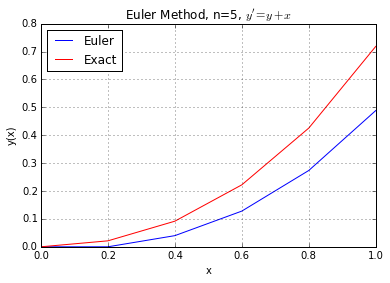

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(x, y):
    return y + x

def euler(f, x0, y0, xn, n):
    h = float(xn - x0) / n
    x = np.linspace(x0, xn, n+1)
    y = np.zeros((n+1,), dtype=float)
    for i in range(n):
        y[i+1] = y[i] + h * f(x[i], y[i])
    return x, y

x, y = euler(f, 0, 0, 1, 5)
yexact = np.exp(x) - x - 1
print('%12s %12s %12s %12s' % ('x', 'Euler', 'Exact', 'Error'))
for xx, y1, y2 in zip(x, y, yexact):
    print('%12.6f %12.6f %12.6f %12.6f' % (xx, y1, y2, y2-y1))
plt.plot(x, y, 'b-', x, yexact, 'r-')
plt.legend(['Euler', 'Exact'], loc=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(r"Euler Method, n=5, $y' = y + x$")
plt.show()

           x         Heun        Exact        Error
    0.000000     0.000000     0.000000     0.000000
    0.200000     0.020000     0.021403     0.001403
    0.400000     0.088400     0.091825     0.003425
    0.600000     0.215848     0.222119     0.006271
    0.800000     0.415335     0.425541     0.010206
    1.000000     0.702708     0.718282     0.015574


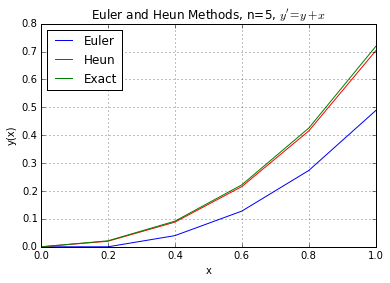

In [2]:
def heun(f, x0, y0, xn, n, debug=False):
    h = float(xn - x0) / n
    x = np.linspace(x0, xn, n+1)
    y = np.zeros((n+1,), dtype=float)
    y[0] = y0
    for i in range(n):
        f1 = f(x[i], y[i])
        y1 = y[i] + h * f1
        f2 = f(x[i+1], y1)
        y[i+1] = y[i] + h / 2 * (f1 + f2)
        if debug:
            print('%4d %12.6f %12.6f %12.6f %12.6f %12.6f' % (i, x[i+1], f1, y1, f2, y[i+1]))
    return x, y

x1, y1 = heun(f, 0, 0, 1, 5)
yexact = np.exp(x) - x - 1
print('%12s %12s %12s %12s' % ('x', 'Heun', 'Exact', 'Error'))
for xx, yy1, yy2 in zip(x1, y1, yexact):
    print('%12.6f %12.6f %12.6f %12.6f' % (xx, yy1, yy2, yy2-yy1))
plt.plot(x, y, 'b-', x1, y1, 'r-', x, yexact, 'g-')
plt.legend(['Euler', 'Heun', 'Exact'], loc=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(r"Euler and Heun Methods, n=5, $y' = y + x$")
plt.show()

           x         Heun        Exact        Error
    0.000000     0.000000     0.000000     0.000000
    0.100000     0.005000     0.005171     0.000171
    0.200000     0.021025     0.021403     0.000378
    0.300000     0.049233     0.049859     0.000626
    0.400000     0.090902     0.091825     0.000923
    0.500000     0.147447     0.148721     0.001275
    0.600000     0.220429     0.222119     0.001690
    0.700000     0.311574     0.313753     0.002179
    0.800000     0.422789     0.425541     0.002752
    0.900000     0.556182     0.559603     0.003421
    1.000000     0.714081     0.718282     0.004201


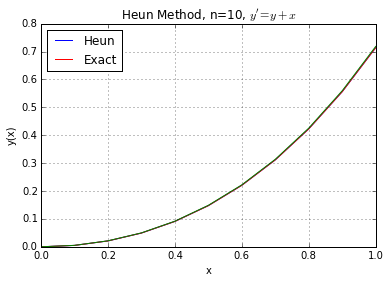

In [3]:
x2, y2 = heun(f, 0, 0, 1, 10)
yexact = np.exp(x2) - x2 - 1
print('%12s %12s %12s %12s' % ('x', 'Heun', 'Exact', 'Error'))
for xx, yy1, yy2 in zip(x2, y2, yexact):
    print('%12.6f %12.6f %12.6f %12.6f' % (xx, yy1, yy2, yy2-yy1))
plt.plot(x2, y2, 'b-', x2, y2, 'r-', x2, yexact, 'g-')
plt.legend(['Heun', 'Exact'], loc=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(r"Heun Method, n=10, $y' = y + x$")
plt.show()

           x         Heun
    0.000000     1.000000
    0.100000     1.005000
    0.200000     1.020354
    0.300000     1.047026
    0.400000     1.086795
    0.500000     1.142568
    0.600000     1.218971
    0.700000     1.323440
    0.800000     1.468384
    0.900000     1.675791
    1.000000     1.988126


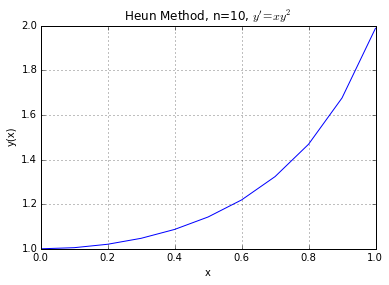

In [4]:
def fx(x, y):
    return x*y**2

x, y = heun(fx, 0, 1, 1, 10)
print('%12s %12s' % ('x', 'Heun'))
for xx, yy in zip(x, y):
    print('%12.6f %12.6f' % (xx, yy))
plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(r"Heun Method, n=10, $y' = x y^2$")
plt.show()

           x         Heun
    0.000000     0.000000
    0.100000     0.000500
    0.200000     0.003035
    0.300000     0.009814
    0.400000     0.023408
    0.500000     0.047024
    0.600000     0.084899
    0.700000     0.142949
    0.800000     0.229887
    0.900000     0.359299
    1.000000     0.553790


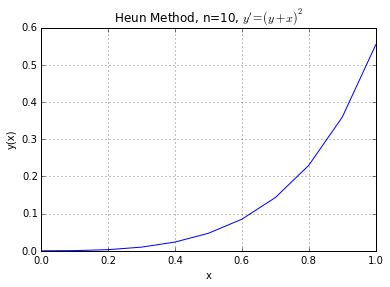

In [5]:
def f3(x, y):
    return (y + x)**2

x, y = heun(f3, 0, 0, 1, 10)
print('%12s %12s' % ('x', 'Heun'))
for xx, yy in zip(x, y):
    print('%12.6f %12.6f' % (xx, yy))
plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(r"Heun Method, n=10, $y' = (y + x)^2$")
plt.show()

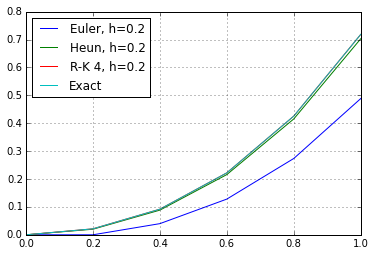

In [6]:
def rk4(f, x0, y0, xn, n):
    x = np.linspace(x0, xn, n+1)
    n = len(x)
    h = x[1] - x[0]
    y = np.zeros(x.shape, dtype=float)
    y[0] = y0
    for i in range(1, n):
        k1 = h * f(x[i-1], y[i-1])
        k2 = h * f(x[i-1]+h/2.0, y[i-1]+k1/2.0)
        k3 = h * f(x[i-1]+h/2.0, y[i-1]+k2/2.0)
        k4 = h * f(x[i-1]+h, y[i-1]+k3)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    return x, y

x, y = euler(f, 0, 0, 1, 5)
x1, y1 = heun(f, 0, 0, 1, 5)
x2, y2 = rk4(f, 0, 0, 1, 5)

plt.plot(x, y, x1, y1, x2, y2, x, np.exp(x)-x-1)
plt.grid()
plt.legend(['Euler, h=0.2', 'Heun, h=0.2', 'R-K 4, h=0.2', 'Exact'], loc=2)
plt.show()

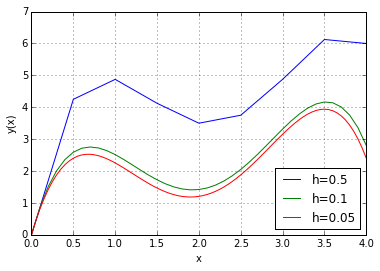

In [7]:
def f2(x, y):
    return -2*x**3 + 12 * x**2 -20*x + 8.5

x0 = 0.0
y0 = 1.0
xn = 4.0

x1, y1 = euler(f2, x0, y0, xn, 8)
x2, y2 = euler(f2, x0, y0, xn, 40)
x3, y3 = euler(f2, x0, y0, xn, 80)

plt.plot(x1, y1, x2, y2, x3, y3)
plt.grid()
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend(['h=0.5', 'h=0.1', 'h=0.05'], loc=4)
plt.show()

In [8]:
def f4(x, y):
    return x * y**2

x, y = euler(f4, 0, 1, 1, 10)

for xx, yy in zip(x, y):
    print('%12.6f %12.6f' % (xx, yy))

    0.000000     0.000000
    0.100000     0.000000
    0.200000     0.000000
    0.300000     0.000000
    0.400000     0.000000
    0.500000     0.000000
    0.600000     0.000000
    0.700000     0.000000
    0.800000     0.000000
    0.900000     0.000000
    1.000000     0.000000


In [9]:
def func(x, y):
    return (x + y)**2

x, y = heun(func, 0, 0, 0.5, 5, True)
for xx, yy in zip(x, y):
    print('%12.6f %12.6f' % (xx, yy))

   0     0.100000     0.000000     0.000000     0.010000     0.000500
   1     0.200000     0.010100     0.001510     0.040606     0.003035
   2     0.300000     0.041223     0.007158     0.094346     0.009814
   3     0.400000     0.095985     0.019412     0.175907     0.023408
   4     0.500000     0.179275     0.041336     0.293044     0.047024
    0.000000     0.000000
    0.100000     0.000500
    0.200000     0.003035
    0.300000     0.009814
    0.400000     0.023408
    0.500000     0.047024
